<a href="https://colab.research.google.com/github/aim97/Neural-networks/blob/master/5-CNNs/handwriting-recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwriting recognition
Demo on using Convolutional neural networks (CNNs)


In [0]:
# add the necessary imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

First things first we need to load the dataset for the training **MINST**, luckily for us, the dataset we need is available on keras by default through *keras datasets* so we need only choose the dataset we will work on and load it as follows

### MNIST dataset
- It's a dataset for handwritten English numbers.
- the labels are obviously 10 the digits from 0 to 9.
- the data are images of 28*28 pixels, grayscale images of handwritten numbers.

In [0]:
# load the data
minst = keras.datasets.mnist
(tr_data, tr_labels), (ts_data, ts_labels) = minst.load_data()

As you meight know, Neural nets work better when data are normalized specially in vaues bettween 0 and 1, since we know the maximum value for the image pixel is 255, we will divide by that to normalize image pixels of data images.

We also need to reshape the input images to match the expected shape of the Convolutional layer which expects a 3 dimensional shape, so the images becomes 3 dimentional as well by adding another dimension for pixel values.


<sub><sup><i>**Note:** we wouldn't need the reshape if images were colored, since we already had a third dimension for the channels.</i></sup><sub>

In [16]:
# normalize image pixels
tr_data = tr_data / 255
tr_data = tr_data.reshape(tr_data.shape[0], 28, 28, 1)
ts_data = ts_data / 255
ts_data = ts_data.reshape(ts_data.shape[0], 28, 28, 1)

# dataset shape
print('training data shape: {}'.format(tr_data.shape))
print('training lebels shape: {}'.format(tr_labels.shape))
print('testing data shape: {}'.format(ts_data.shape))
print('testing labels shape: {}'.format(ts_labels.shape))

training data shape: (60000, 28, 28, 1)
training lebels shape: (60000,)
testing data shape: (10000, 28, 28, 1)
testing labels shape: (10000,)


first label: 5


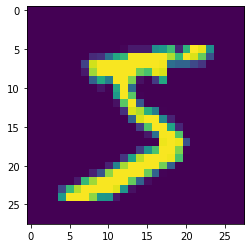

In [17]:
# show item
print('first label: {}'.format(tr_labels[0]))
plt.imshow(tr_data[0,:,:,0])
plt.show()

In [0]:
# build the model
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
# let's test after each epoch of training to see how well it's going
class Test_each_epoch(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    model.evaluate(ts_data, ts_labels)

# define call back
call_back = Test_each_epoch()


In [20]:
# fit the mode
model.fit(x=tr_data, y=tr_labels, epochs=5, callbacks=[call_back])

Epoch 1/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1191 - accuracy: 0.9631
Epoch 2/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0429 - accuracy: 0.9866
Epoch 3/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0282 - accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0213 - accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0150 - accuracy: 0.9953


In [21]:
# test model
model.evaluate(ts_data, ts_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.0311 - accuracy: 0.9907


[0.03111807256937027, 0.9907000064849854]